<a href="https://colab.research.google.com/github/Fordfire337/CS-4410-intro-machine-learning/blob/main/HW5JW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

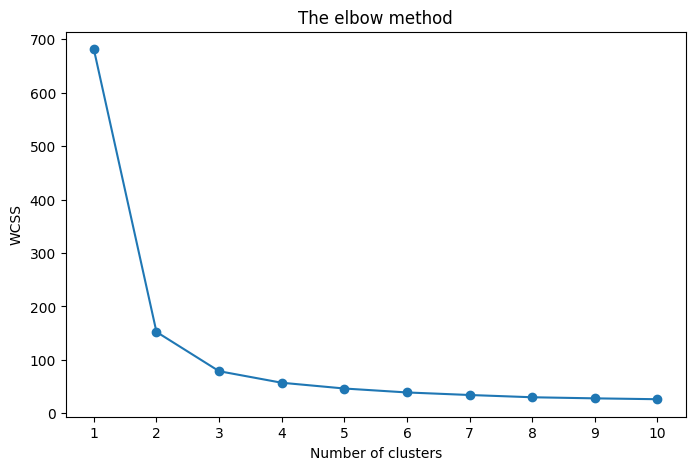

WCSS values by k:
k=1: 681.3706
k=2: 152.3480
k=3: 78.8514
k=4: 57.2285
k=5: 46.4462
k=6: 39.0660
k=7: 34.2982
k=8: 30.0631
k=9: 28.0250
k=10: 26.3932


In [3]:
# Part 1: Elbow Method on Iris Dataset, k-Means Clustering
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load Iris dataset
iris = load_iris()
X_iris = iris.data

# Compute WCSS/inertia for k = 1 to 10
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=11, n_init=10)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(False)
plt.show()

# Print values
print("WCSS values by k:")
for k, val in enumerate(wcss, start=1):
    print(f"k={k}: {val:.4f}")

In [4]:
# Part 2: MNIST - Logistic Regression with and without PCA
import time
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Load MNIST

print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target.astype(np.int64)  # convert labels from strings to ints

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=11, stratify=y
)

print(f"Training samples: {X_train.shape}")
print(f"Testing samples:  {X_test.shape}")


# Without PCA
print("\nLogistic Regression WITHOUT PCA")
scaler_no_pca = StandardScaler()

start_no_pca = time.perf_counter()

# Scale
X_train_scaled = scaler_no_pca.fit_transform(X_train)
X_test_scaled = scaler_no_pca.transform(X_test)

# Logistic Regression
logisticRegr_no_pca = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=11
)

fit_start_no_pca = time.perf_counter()
logisticRegr_no_pca.fit(X_train_scaled, y_train)
fit_end_no_pca = time.perf_counter()

y_pred_no_pca = logisticRegr_no_pca.predict(X_test_scaled)
end_no_pca = time.perf_counter()

acc_no_pca = accuracy_score(y_test, y_pred_no_pca)

print(f"Accuracy (without PCA): {acc_no_pca:.4f}")
print(f"Training time (without PCA): {fit_end_no_pca - fit_start_no_pca:.2f} seconds")
print(f"Total time (without PCA): {end_no_pca - start_no_pca:.2f} seconds")


# With PCA (0.95 variance)
print("\nLogistic Regression WITH PCA (0.95)")
scaler_pca = StandardScaler()
pca = PCA(0.95, random_state=11)

start_pca = time.perf_counter()

# Scale
X_train_scaled_pca = scaler_pca.fit_transform(X_train)
X_test_scaled_pca = scaler_pca.transform(X_test)

# PCA fit/transform
pca_start = time.perf_counter()
X_train_pca = pca.fit_transform(X_train_scaled_pca)
X_test_pca = pca.transform(X_test_scaled_pca)
pca_end = time.perf_counter()

print(f"Original features: {X_train.shape[1]}")
print(f"Reduced features after PCA(0.95): {X_train_pca.shape[1]}")

# Logistic Regression on PCA features
logisticRegr_pca = LogisticRegression(
    solver='lbfgs',
    max_iter=1000,
    random_state=11
)

fit_start_pca = time.perf_counter()
logisticRegr_pca.fit(X_train_pca, y_train)
fit_end_pca = time.perf_counter()

y_pred_pca = logisticRegr_pca.predict(X_test_pca)
end_pca = time.perf_counter()

acc_pca = accuracy_score(y_test, y_pred_pca)

print(f"Accuracy (with PCA): {acc_pca:.4f}")
print(f"PCA transform time: {pca_end - pca_start:.2f} seconds")
print(f"Training time (with PCA): {fit_end_pca - fit_start_pca:.2f} seconds")
print(f"Total time (with PCA): {end_pca - start_pca:.2f} seconds")


# Comparison
print("\nComparison Summary")
print(f"Accuracy without PCA: {acc_no_pca:.4f}")
print(f"Accuracy with PCA:    {acc_pca:.4f}")
print(f"Total time without PCA: {end_no_pca - start_no_pca:.2f} s")
print(f"Total time with PCA:    {end_pca - start_pca:.2f} s")

time_saved = (end_no_pca - start_no_pca) - (end_pca - start_pca)
print(f"Time difference (without PCA - with PCA): {time_saved:.2f} s")

Loading MNIST dataset...
Training samples: (52500, 784)
Testing samples:  (17500, 784)

Logistic Regression WITHOUT PCA
Accuracy (without PCA): 0.9110
Training time (without PCA): 65.14 seconds
Total time (without PCA): 67.50 seconds

Logistic Regression WITH PCA (0.95)
Original features: 784
Reduced features after PCA(0.95): 329
Accuracy (with PCA): 0.9207
PCA transform time: 2.84 seconds
Training time (with PCA): 48.15 seconds
Total time (with PCA): 52.30 seconds

Comparison Summary
Accuracy without PCA: 0.9110
Accuracy with PCA:    0.9207
Total time without PCA: 67.50 s
Total time with PCA:    52.30 s
Time difference (without PCA - with PCA): 15.20 s
